In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import acovf

# (N,V,E)


# Grafico di temperature.dat e total_energy.dat

/var/folders/82/8n01sj9x33b3lvjlcvfhrcc40000gn/T/ipykernel_6142/3414194789.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  temperature_data = pd.read_csv('NSL_SIMULATOR/OUTPUT_NVE/temperature.dat', skiprows= 1,header=None, delim_whitespace=True)


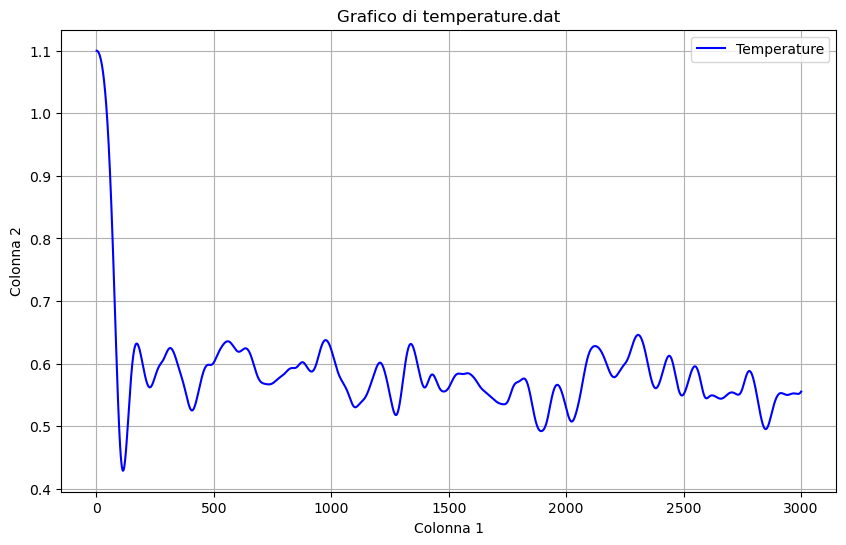

In [51]:
# Caricamento del file temperature.dat
temperature_data = pd.read_csv('NSL_SIMULATOR/OUTPUT_NVE/temperature.dat', skiprows= 1,header=None, delim_whitespace=True)

# Estrazione delle colonne
x_temp = temperature_data.iloc[:3000, 0]  # Prima colonna
y_temp = temperature_data.iloc[:3000, 1]  # Seconda colonna

# Creazione del grafico
plt.figure(figsize=(10, 6))
plt.plot(x_temp, y_temp, linestyle='-', marker='', color='blue', label='Temperature')
plt.xlabel('Colonna 1')
plt.ylabel('Colonna 2')
plt.title('Grafico di temperature.dat')
plt.legend()
plt.grid()
plt.show()

/var/folders/82/8n01sj9x33b3lvjlcvfhrcc40000gn/T/ipykernel_6142/120344435.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  potential_data = pd.read_csv('NSL_SIMULATOR/OUTPUT_NVE/potential_energy.dat', skiprows= 1,header=None, delim_whitespace=True)


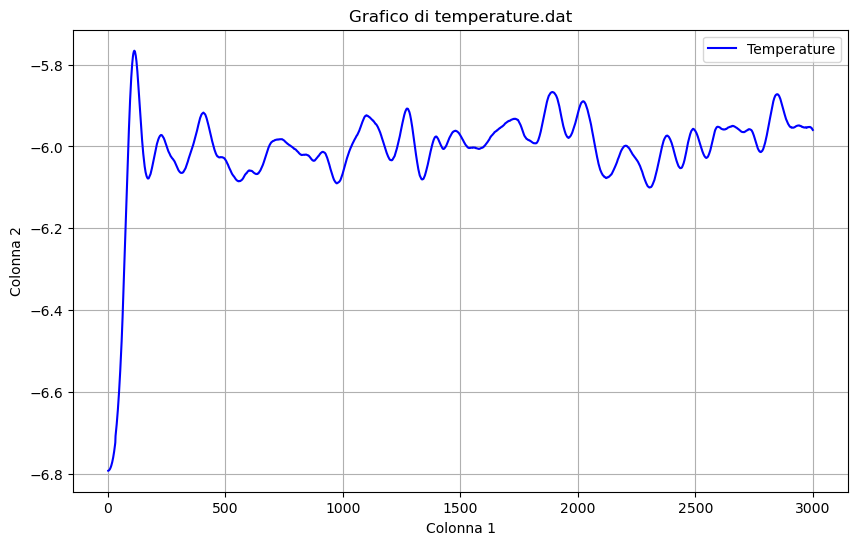

In [77]:
# Caricamento del file temperature.dat
potential_data = pd.read_csv('NSL_SIMULATOR/OUTPUT_NVE/potential_energy.dat', skiprows= 1,header=None, delim_whitespace=True)

# Estrazione delle colonne
x_temp = potential_data.iloc[:3000, 0]  # Prima colonna
y_temp = potential_data.iloc[:3000, 1]  # Seconda colonna

# Creazione del grafico
plt.figure(figsize=(10, 6))
plt.plot(x_temp, y_temp, linestyle='-', marker='', color='blue', label='Temperature')
plt.xlabel('Colonna 1')
plt.ylabel('Colonna 2')
plt.title('Grafico di temperature.dat')
plt.legend()
plt.grid()
plt.show()

# Calcolo della autocorrelazione


In [ ]:
read_NVE = pd.read_csv('NSL_SIMULATOR/OUTPUT_NVE/potential_energy.dat', header=None, skiprows=1, delim_whitespace=True)
y = read_NVE.iloc[:, 1]

"""
def autocorrelazione(m):

    Calcola la funzione di autocorrelazione normalizzata della sequenza m[0..N-1]
    secondo la formula:
    
    χ(t) = [⟨m(i) m(i+t)⟩_{i=0..N-1-t} - ⟨m(i)⟩_{i=0..N-1-t} · ⟨m(i+t)⟩_{i=0..N-1-t}]
           ------------------------------------------------------------------------
           ⟨m(i)^2⟩_{i=0..N-1} - ⟨m(i)⟩_{i=0..N-1}^2

    dove ⟨·⟩ indica la media aritmetica.

    m = np.asarray(m, dtype=float)
    T_MAX = m.size

    # Denominatore (varianza secondo la definizione nel tuo schema)
    mean_all = m.mean()
    denom = (m**2).mean() - mean_all**2
    if denom == 0:
        raise ValueError("Denominatore nullo (varianza = 0), autocorrelazione non definita.")

    # Costruiamo il vettore di autocorrelazione per lag t = 0,1,...,N-1
    chi = np.empty(T_MAX)
    for t in range(200):
        M = T_MAX - t
        segment1 = m[:M]
        segment2 = m[t:]
        # ⟨m(i)m(i+t)⟩
        avg_prod = np.dot(segment1, segment2) / M
        # ⟨m(i)⟩ e ⟨m(i+t)⟩
        avg1 = segment1.mean()
        avg2 = segment2.mean()
        # valore di χ(t)
        chi[t] = (avg_prod - avg1*avg2) / denom

    return chi

# Calcolo dell'autocorrelazione
chi = autocorrelazione(df_temp.iloc[:200, 1])"""

def acf_mine(x, nlags):
    avf = acovf(x, fft=True)
    acf_values = avf[: nlags + 1] / avf[0]
    return acf_values
    
chi = acf_mine(y, 3000)


/var/folders/82/8n01sj9x33b3lvjlcvfhrcc40000gn/T/ipykernel_6142/125944900.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  read = pd.read_csv('NSL_SIMULATOR/OUTPUT_NVE/potential_energy.dat', header=None, skiprows=1, delim_whitespace=True)


# Grafico della autocorrelazione

<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\c'
/var/folders/82/8n01sj9x33b3lvjlcvfhrcc40000gn/T/ipykernel_6142/3530620138.py:5: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('$\chi(t)$')


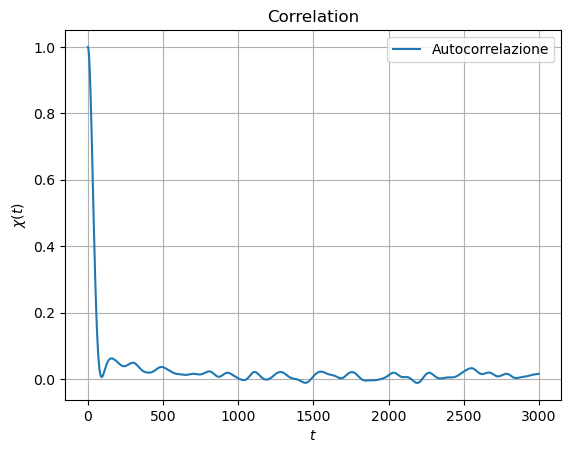

In [78]:
x1 = np.arange(len(chi)) 
plt.figure(1)
plt.plot(x1, chi, label='Autocorrelazione')
plt.xlabel('$t$')
plt.ylabel('$\chi(t)$')
plt.title('Correlation')
plt.legend()
plt.grid()
plt.show()

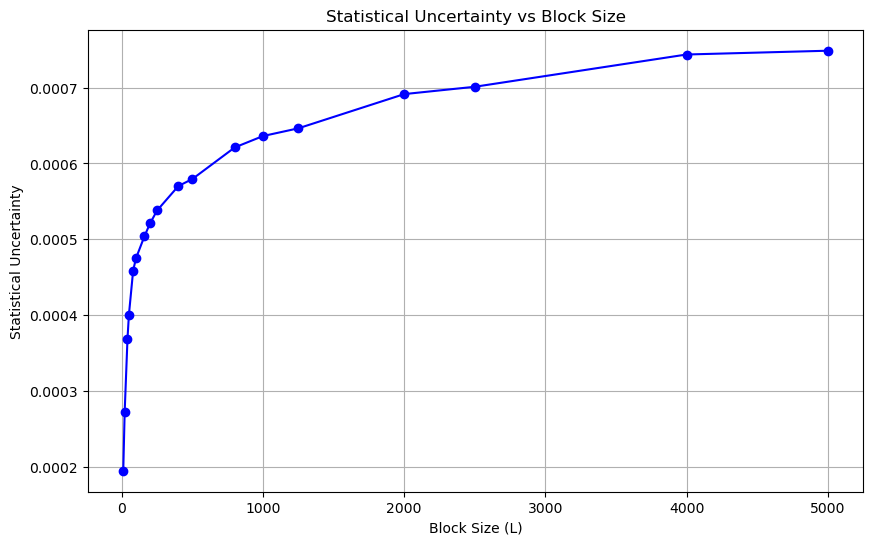

In [79]:
# Define the data blocking technique
def data_blocking(data, block_sizes):
    M = len(data)  # Total number of data points
    uncertainties = []

    for L in block_sizes:
        if M % L != 0:
            continue  # Skip block sizes that don't divide the data evenly

        N = M // L  # Number of blocks
        block_means = []

        # Calculate the mean for each block
        for i in range(N):
            block = data[i * L:(i + 1) * L]
            block_means.append(block.mean())

        # Calculate the statistical uncertainty
        block_means = np.array(block_means)
        uncertainty = np.sqrt(block_means.var(ddof=1) / N)
        uncertainties.append((L, uncertainty))

    return uncertainties

# Extract the data (U/N) from the y series
data = y.values

# Define block sizes from L=10 to L=5000
block_sizes = np.arange(10, 5001, 10)

# Perform data blocking
results = data_blocking(data, block_sizes)

# Extract block sizes and uncertainties
block_sizes, uncertainties = zip(*results)

# Plot the statistical uncertainties as a function of block size
plt.figure(figsize=(10, 6))
plt.plot(block_sizes, uncertainties, marker='o', linestyle='-', color='blue')
plt.xlabel('Block Size (L)')
plt.ylabel('Statistical Uncertainty')
plt.title('Statistical Uncertainty vs Block Size')
plt.grid()
plt.show()

# Observation:
# After the block size becomes large enough, the statistical uncertainties stabilize.
# This indicates that the data blocking technique effectively reduces noise and provides a reliable estimate of the uncertainty.

# (N,V,T)

# Equilibrazione

/var/folders/82/8n01sj9x33b3lvjlcvfhrcc40000gn/T/ipykernel_6142/909649652.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  temperature_data = pd.read_csv('NSL_SIMULATOR/OUTPUT/acceptance.dat', skiprows= 1,header=None, delim_whitespace=True)


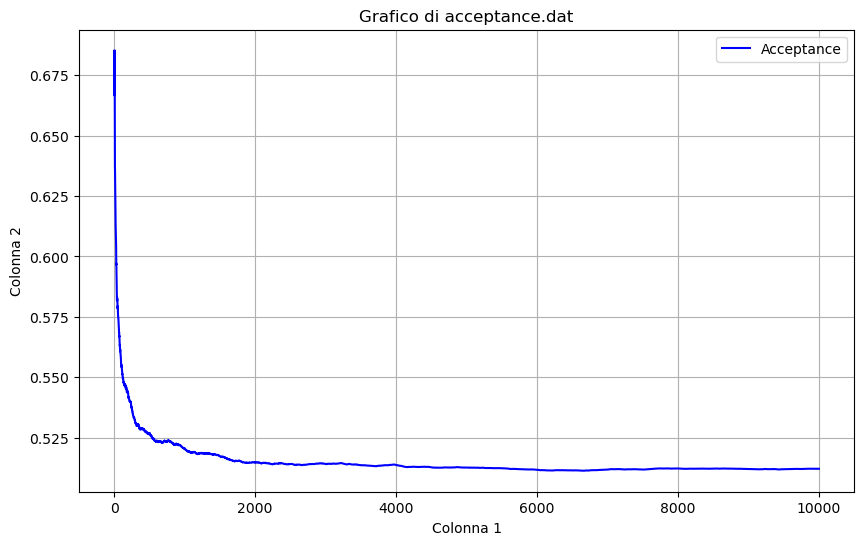

In [62]:
# Caricamento del file temperature.dat
temperature_data = pd.read_csv('NSL_SIMULATOR/OUTPUT/acceptance.dat', skiprows= 1,header=None, delim_whitespace=True)

# Estrazione delle colonne
x_temp = temperature_data.iloc[:10000, 0]  # Prima colonna
y_temp = temperature_data.iloc[:10000, 1]  # Seconda colonna

# Creazione del grafico
plt.figure(figsize=(10, 6))
plt.plot(x_temp, y_temp, linestyle='-', marker='', color='blue', label='Acceptance')
plt.xlabel('Colonna 1')
plt.ylabel('Colonna 2')
plt.title('Grafico di acceptance.dat')
plt.legend()
plt.grid()
plt.show()

/var/folders/82/8n01sj9x33b3lvjlcvfhrcc40000gn/T/ipykernel_6142/1251068121.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  temperature_data = pd.read_csv('NSL_SIMULATOR/OUTPUT/potential_energy.dat', skiprows= 1,header=None, delim_whitespace=True)


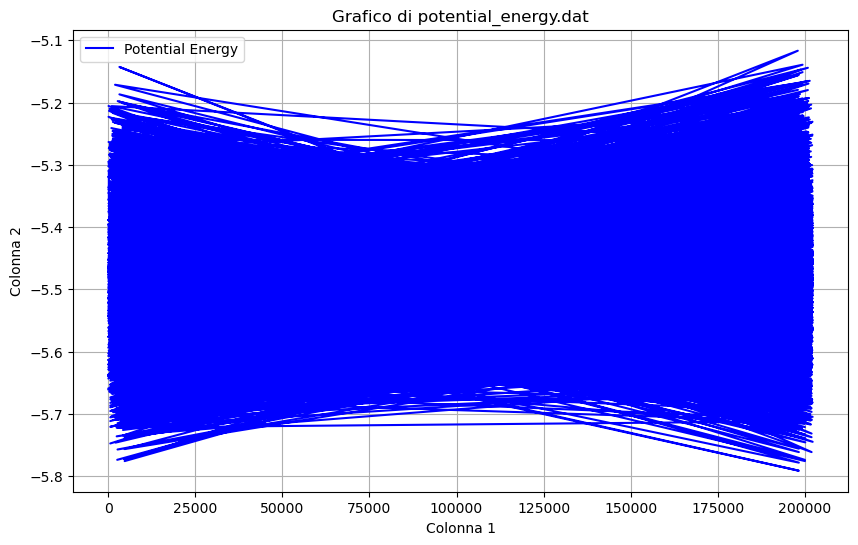

In [ ]:
# Caricamento del file temperature.dat
temperature_data = pd.read_csv('NSL_SIMULATOR/OUTPUT/potential_energy.dat', skiprows= 1,header=None, delim_whitespace=True)

# Estrazione delle colonne
x_temp = temperature_data.iloc[:10000, 0]  # Prima colonna
y_temp = temperature_data.iloc[:10000, 1]  # Seconda colonna

# Creazione del grafico
plt.figure(figsize=(10, 6))
plt.plot(x_temp, y_temp, linestyle='-', marker='', color='blue', label='Potential Energy')
plt.xlabel('Colonna 1')
plt.ylabel('Colonna 2')
plt.title('Grafico di potential_energy.dat')
plt.legend()
plt.grid()
plt.show()

## Autocorrelazione MC

In [69]:
read_MC = pd.read_csv('NSL_SIMULATOR/OUTPUT/potential_energy.dat', header=None, skiprows=1, delim_whitespace=True)
y_MC = read_MC.iloc[:, 1]

def acf_mine(x, nlags):
    avf = acovf(x, fft=True)
    acf_values = avf[: nlags + 1] / avf[0]
    return acf_values
    
chi_MC = acf_mine(y_MC, 3000)

/var/folders/82/8n01sj9x33b3lvjlcvfhrcc40000gn/T/ipykernel_6142/1890840676.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  read_MC = pd.read_csv('NSL_SIMULATOR/OUTPUT/potential_energy.dat', header=None, skiprows=1, delim_whitespace=True)


<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\c'
/var/folders/82/8n01sj9x33b3lvjlcvfhrcc40000gn/T/ipykernel_6142/1988924418.py:5: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('$\chi(t)$')


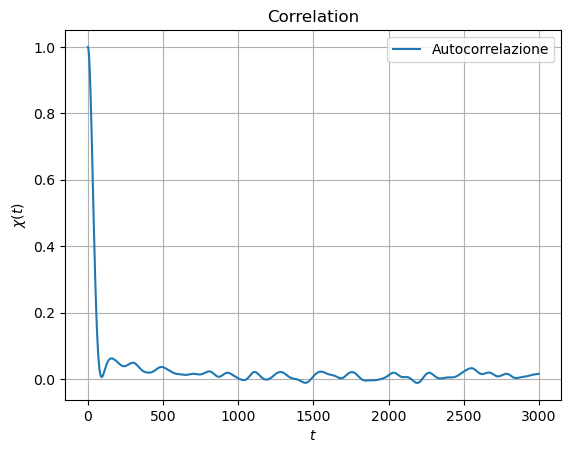

In [70]:
x1 = np.arange(len(chi))  # Adjust x1 to match the length of chi
plt.figure(1)
plt.plot(x1, chi, label='Autocorrelazione')
plt.xlabel('$t$')
plt.ylabel('$\chi(t)$')
plt.title('Correlation')
plt.legend()
plt.grid()
plt.show()

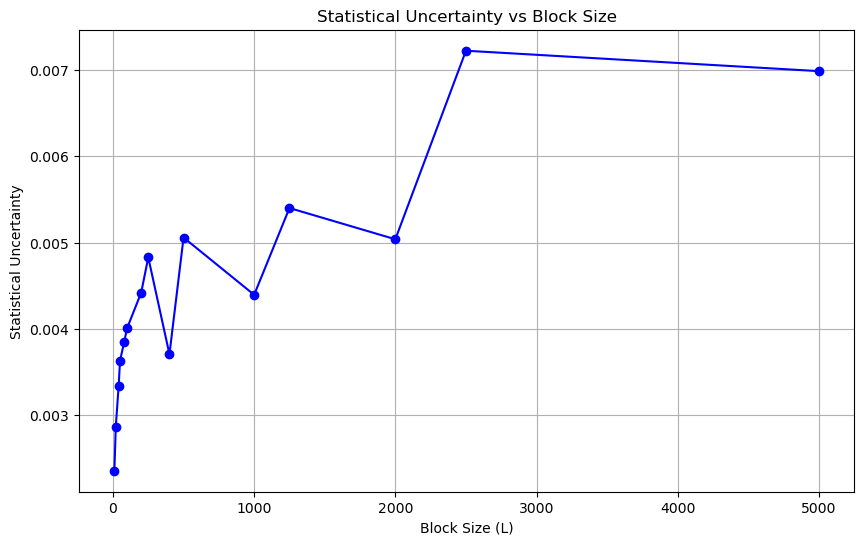

In [71]:
# Extract the data (U/N) from the y series
data_MC = y_MC.values

# Define block sizes from L=10 to L=5000
block_sizes = np.arange(10, 5001, 10)

# Perform data blocking
results = data_blocking(data_MC, block_sizes)

# Extract block sizes and uncertainties
block_sizes, uncertainties = zip(*results)

# Plot the statistical uncertainties as a function of block size
plt.figure(figsize=(10, 6))
plt.plot(block_sizes, uncertainties, marker='o', linestyle='-', color='blue')
plt.xlabel('Block Size (L)')
plt.ylabel('Statistical Uncertainty')
plt.title('Statistical Uncertainty vs Block Size')
plt.grid()
plt.show()

In [76]:
# Caricamento del file temperature.dat
temperature_data = pd.read_csv('NSL_SIMULATOR/OUTPUT/potential_energy.dat', skiprows= 1,header=None, delim_whitespace=True)

# Estrazione delle colonne
x_temp = temperature_data.iloc[:, 0]  # Prima colonna
y_temp = temperature_data.iloc[:, 1]  # Seconda colonna

# Creazione del grafico
plt.figure(figsize=(10, 6))
plt.plot(x_temp, y_temp, linestyle='-', marker='', color='blue', label='Potential Energy')
plt.xlabel('Colonna 1')
plt.ylabel('Colonna 2')
plt.title('Grafico di potential_energy.dat')
plt.legend()
plt.grid()
plt.show()

/var/folders/82/8n01sj9x33b3lvjlcvfhrcc40000gn/T/ipykernel_6142/1895991719.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  temperature_data = pd.read_csv('NSL_SIMULATOR/OUTPUT/potential_energy.dat', skiprows= 1,header=None, delim_whitespace=True)


OverflowError: Exceeded cell block limit in Agg.  Please set the value of rcParams['agg.path.chunksize'], (currently 0) to be greater than 100 or increase the path simplification threshold(rcParams['path.simplify_threshold'] = 0.111111111111 by default and path.simplify_threshold = 0.111111111111 on the input).

<Figure size 1000x600 with 1 Axes>

# 7.3 - gofr

/var/folders/82/8n01sj9x33b3lvjlcvfhrcc40000gn/T/ipykernel_6142/3994512481.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gofr_data = pd.read_csv('NSL_SIMULATOR/OUTPUT/gofr.dat', skiprows=1, header=None, delim_whitespace=True)


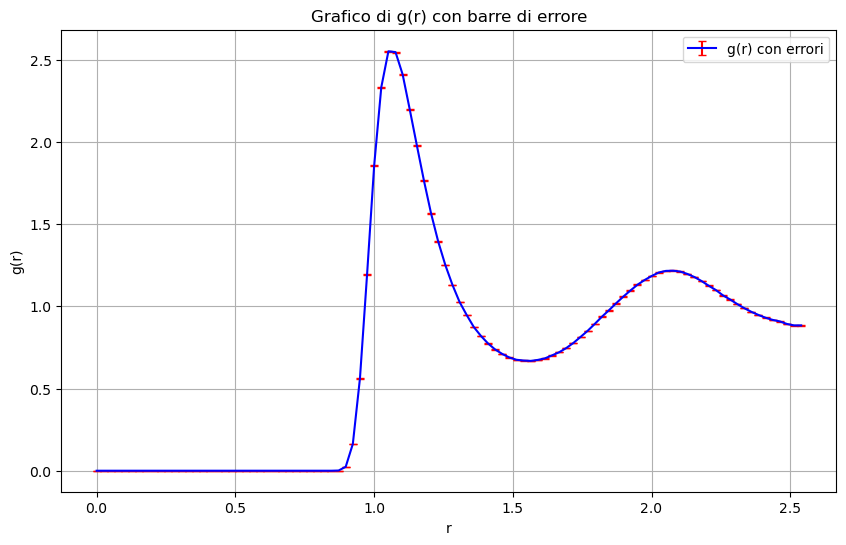

In [81]:
# Caricamento del file gofr.dat
gofr_data = pd.read_csv('NSL_SIMULATOR/OUTPUT/gofr.dat', skiprows=1, header=None, delim_whitespace=True)

# Estrazione delle colonne
x_gofr = gofr_data.iloc[:, 0]  # Prima colonna (r)
y_gofr = gofr_data.iloc[:, 1]  # Seconda colonna (g(r))
y_err = gofr_data.iloc[:, 2]   # Terza colonna (errori)

# Creazione del grafico con barre di errore
plt.figure(figsize=(10, 6))
plt.errorbar(x_gofr, y_gofr, yerr=y_err, linestyle='-', color='blue', ecolor='red', capsize=3, label='g(r) con errori')
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('Grafico di g(r) con barre di errore')
plt.legend()
plt.grid()
plt.show()

# TO DO
Ora devo fare l'ultimo punto. 
Prima di questo farei andare tutte le simulazioni precedenti e mi accerterei che tutte le cose funzionino. Organizzare i file di output e fare una cosa coerente con tutti i risultati salvati. 
- 7.2 Per MC e MD salvare separatamente gli output di equilibrazione e della Run con 500000 estrazioni
- 7.4 da fare completamente